# Estimating Economic Growth using Deep Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [2]:
data = pd.read_csv('data_change_final.csv')
data

,gdp_deflator,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita_change
0,45.018770,-2.309113e+08,4.918790e+08,9.919000,5886907.0,116.3,3023.20,1.855064e+08,102.663238,98.77,...,19.760000,18.000000,23680871.0,67.580448,46.231,10.704,-20393.25,1.689670e+09,1.025522e+09,11.257203
1,50.093030,-2.307150e+08,7.126885e+08,8.830000,6198355.0,112.1,4244.00,1.883519e+08,101.562371,96.05,...,19.091144,18.963333,24726684.0,65.520050,45.507,10.356,-105319.20,1.553454e+09,1.370816e+09,20.698303
2,55.559569,-2.356262e+08,9.238376e+08,5.750358,6483460.0,107.9,2675.60,1.976982e+08,100.349127,106.32,...,21.744152,0.000000,25654277.0,60.358543,44.723,10.003,-183431.65,1.931964e+09,1.664800e+09,30.649168
3,59.559720,-1.792178e+08,8.660660e+08,6.204500,6644359.0,103.7,2833.15,1.856889e+08,100.970943,97.63,...,22.674953,0.000000,26433049.0,57.309657,43.870,9.645,-102640.95,1.996295e+09,1.966653e+09,21.702407
4,72.977189,-4.057204e+08,1.675581e+09,6.518000,6770366.0,99.5,2357.15,3.502625e+08,101.600183,108.92,...,24.618376,0.000000,27100536.0,68.419065,42.944,9.287,-1046361.00,2.934600e+09,2.620449e+09,95.959546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,96.127432,-3.443000e+08,-3.479166e+08,5.370000,6194591.0,81.4,8541.00,2.311408e+08,81.230012,88.43,...,23.640000,20.000000,12894316.0,83.582710,36.526,12.384,-128308.20,1.222053e+09,3.062978e+09,145.322148
4708,100.000000,-3.498500e+08,-2.406172e+09,14.496500,6285545.0,73.8,9491.00,2.846143e+08,81.775797,94.08,...,15.200000,19.800000,13115131.0,76.182669,36.292,11.167,-622997.00,1.376807e+09,4.335296e+09,211.315799
4709,109.370603,-3.730500e+08,-9.432642e+08,13.044500,6385796.0,67.8,9782.00,3.287764e+08,82.350264,92.05,...,21.990000,19.600000,13350356.0,78.333111,35.768,10.115,-123286.35,1.363954e+09,4.543589e+09,125.031016
4710,109.094835,-4.728000e+08,-5.911380e+08,4.770000,6486791.0,64.4,9465.00,3.369867e+08,82.840045,91.23,...,14.700000,17.700000,13586681.0,88.693420,34.978,9.277,-123286.35,1.704942e+09,4.624054e+09,4.898522


## Splitting the data into training and validation data

In [3]:
X = data.drop('gdp_per_capita_change', axis=1)
y = data.gdp_per_capita_change

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Building the Deep Learning model

In [5]:
input_shape = [X_train.shape[1]]

In [6]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='mae',
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1,
    patience=20,
    restore_best_weights=True,
)

## Training the model

Epoch 1/400
30/30 [==============================] - 2s 26ms/step - loss: 1015.7566 - val_loss: 1217.2512
Epoch 2/400
30/30 [==============================] - 0s 12ms/step - loss: 1086.4783 - val_loss: 1217.3979
Epoch 3/400
30/30 [==============================] - 0s 14ms/step - loss: 1042.2366 - val_loss: 1217.2021
Epoch 4/400
30/30 [==============================] - 0s 13ms/step - loss: 1050.7061 - val_loss: 1216.7950
Epoch 5/400
30/30 [==============================] - 0s 11ms/step - loss: 1064.8256 - val_loss: 1217.1169
Epoch 6/400
30/30 [==============================] - 0s 12ms/step - loss: 1042.7498 - val_loss: 1216.1306
Epoch 7/400
30/30 [==============================] - 0s 10ms/step - loss: 980.5396 - val_loss: 1213.8301
Epoch 8/400
30/30 [==============================] - 0s 12ms/step - loss: 971.8349 - val_loss: 1212.3740
Epoch 9/400
30/30 [==============================] - 0s 12ms/step - loss: 1022.9691 - val_loss: 1208.0942
Epoch 10/400
30/30 [============================

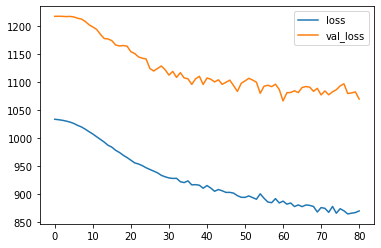

In [8]:
epochs = 400
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

## Testing the model

In [9]:
test_loss = model.evaluate(
    X_test, y_test,
    verbose=0,
)

print('Mean Absolute Error:', test_loss)

Mean Absolute Error: 1049.6259765625
